# Effect of Handwashing
 Statistical analysis of the effect of handwashing policy on hospital death rates.
 
 
 We'll be using datasets collected by Dr. Ignaz Semmelweis, the discoverer of the benefits of handwashing. He presented this data to medical scientists without statistical arguments and visualisations (that was almost 200 years ago), and his discovery was rejected and ridiculed. We'll fix this now.

In 1840's, Dr. Semmelweis noticed the difference in death rates of women giving birth between two of the Vienna General Hospital's clinics:

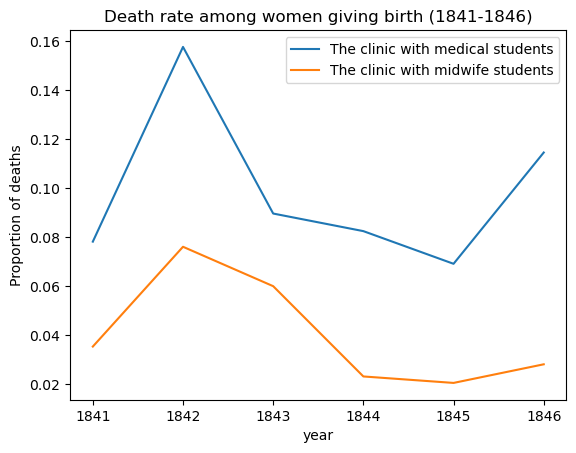

In [12]:
# Importing modules
import pandas as pd
import matplotlib.pyplot as plt

# This makes plots appear in the notebook
%matplotlib inline

# Compare yearly death rates in 2 clinics

yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')
yearly['proportion_deaths'] = yearly['deaths'] / yearly['births']
clinic_1 = yearly[yearly['clinic'] == 'clinic 1']
clinic_2 = yearly[yearly['clinic'] == 'clinic 2']

ax = clinic_1.plot(x='year', y='proportion_deaths', label='The clinic with medical students')
clinic_2.plot(x='year', y='proportion_deaths', label='The clinic with midwife students', ax=ax, ylabel='Proportion of deaths')
ax.set_title('Death rate among women giving birth (1841-1846)')
plt.show()

The clinic, in which mostly medical students served, was consistently producing much higher death rates. 

While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses. Dr. Semmelweis started to suspect that something on the corpses is spreading from the hands of the medical students, causing deadly childbed fever.

So Dr. Semmelweis made a new policy for the medical students: *Wash your hands before operations!*

The effects were so drastic, that we can see it in the monthly graph:

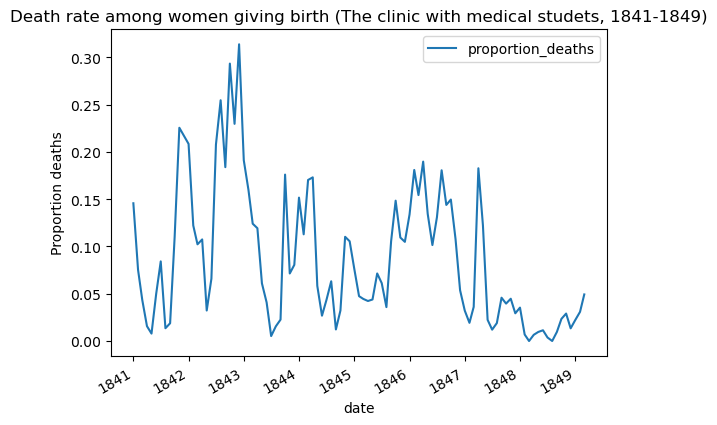

In [13]:
# Plot monthly proportion of deaths
monthly = pd.read_csv('datasets/monthly_deaths.csv', parse_dates=["date"])
monthly["proportion_deaths"] = monthly['deaths'] / monthly['births']
ax = monthly.plot(x='date', y='proportion_deaths', ylabel='Proportion deaths')
ax.set_title('Death rate among women giving birth (The clinic with medical studets, 1841-1849)')
plt.show()